In [1]:
import sys
sys.path.insert(0,"../libs/")
import data_cleaning as dc

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
train = pd.read_csv("../data/train.csv")
# clean data
df = dc.massage_df(train)

In [3]:
# look at cats first 
mydf = df[df.AnimalType=="Cat"]

age_bins = pd.DataFrame()

# count by age
age_bins["all_outcomes"]  = mydf.loc[:,"age_numeric_days"].value_counts()

# count each outcome by age
for outcome in df.OutcomeType.unique():
    selector = mydf.OutcomeType == outcome
    age_bins[outcome] = mydf.loc[selector,"age_numeric_days"].value_counts()
# end for
age_bins = age_bins.sort_index()

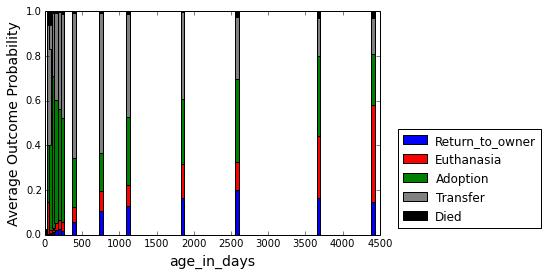

In [4]:
# plot percentage
width=50

fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_xlabel("age_in_days",fontsize=14)
ax.set_ylabel("Average Outcome Probability",fontsize=14)

colors={'Return_to_owner':'b', 'Euthanasia':'r', 'Adoption':'g', 'Transfer':'gray', 'Died':'black'}

bottom = age_bins.Died.values - age_bins.Died.values
for outcome in df.OutcomeType.unique():
    # probability of outcome at each age
    ax.bar(age_bins.index,age_bins[outcome]/age_bins.all_outcomes
           ,width,bottom=bottom,color=colors[outcome],label=outcome)
    bottom += age_bins[outcome]/age_bins.all_outcomes
# end for outcome
plt.legend(bbox_to_anchor=(1.5,0.5))

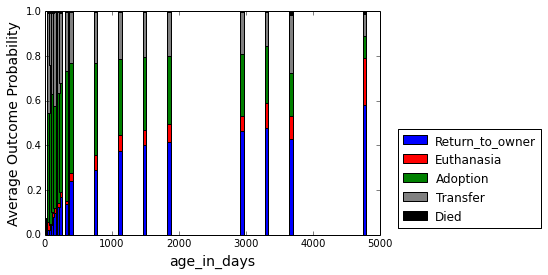

In [5]:
# now dogs
mydf = df[df.AnimalType=="Dog"]

age_bins = pd.DataFrame()

# count by age
age_bins["all_outcomes"]  = mydf.loc[:,"age_numeric_days"].value_counts()

# count each outcome by age
for outcome in df.OutcomeType.unique():
    selector = mydf.OutcomeType == outcome
    age_bins[outcome] = mydf.loc[selector,"age_numeric_days"].value_counts()
# end for
age_bins = age_bins.sort_index()

# plot percentage
width=50

fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_xlabel("age_in_days",fontsize=14)
ax.set_ylabel("Average Outcome Probability",fontsize=14)

colors={'Return_to_owner':'b', 'Euthanasia':'r', 'Adoption':'g', 'Transfer':'gray', 'Died':'black'}

bottom = age_bins.Died.values - age_bins.Died.values
for outcome in df.OutcomeType.unique():
    # probability of outcome at each age
    ax.bar(age_bins.index,age_bins[outcome]/age_bins.all_outcomes
           ,width,bottom=bottom,color=colors[outcome],label=outcome)
    bottom += age_bins[outcome]/age_bins.all_outcomes
# end for outcome
plt.legend(bbox_to_anchor=(1.5,0.5))